# Cython

* Example from [here](https://github.com/shekhar270779/Learn_Pandas/blob/master/Cython%20in%20Jupyter-notebook.ipynb) and [this tutorial](https://www.youtube.com/watch?v=CC0IkiNByV4)

**Cython** is a superset of python programming language that gives access into c/c++ constructs. 
- Cython acts as a bridge between Python and C/C++.

Load cython notebook extension (and i have already installed cython )

In [1]:
pip install Cython

Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext cython

In [3]:
%%cython
'''Inside this cell is Cython Code only
'''

def first_cython_function(int i):
    return i * 3.1415926;


In [4]:
# use cython function in a separate (python) cell
first_cython_function(10)

31.415926

In [5]:
%%cython?

Docstring:
::

  %cython [-a] [-+] [-3] [-2] [-f] [-c COMPILE_ARGS]
              [--link-args LINK_ARGS] [-l LIB] [-n NAME] [-L dir] [-I INCLUDE]
              [-S SRC] [--pgo] [--verbose]

Compile and import everything from a Cython code cell.

The contents of the cell are written to a `.pyx` file in the
directory `IPYTHONDIR/cython` using a filename with the hash of the
code. This file is then cythonized and compiled. The resulting module
is imported and all of its symbols are injected into the user's
namespace. The usage is similar to that of `%%cython_pyximport` but
you don't have to pass a module name::

    %%cython
    def f(x):
        return 2.0*x

To compile OpenMP codes, pass the required  `--compile-args`
and `--link-args`.  For example with gcc::

    %%cython --compile-args=-fopenmp --link-args=-fopenmp
    ...

To enable profile guided optimisation, pass the ``--pgo`` option.
Note that the cell itself needs to take care of establishing a suitable
profile when executed. 

In [6]:
def foo(a, b):
    return a + b

In [7]:
from dis import dis 
# disassebles compiled python objects
dis(foo)

  2           0 LOAD_FAST                0 (a)
              2 LOAD_FAST                1 (b)
              4 BINARY_ADD
              6 RETURN_VALUE


In [8]:
%%cython
def cyfoo(a, b):
    return a + b

In [9]:
%timeit foo(1000000, 2000000)

120 ns ± 3.57 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [10]:
%timeit cyfoo(1000000, 2000000)

110 ns ± 2.29 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [11]:
%timeit foo('x', 'y')

139 ns ± 3.65 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [12]:
%timeit cyfoo('x', 'y')

138 ns ± 5.23 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [13]:
def pyfac(n):
    if n <= 1:
        return 1
    return n * pyfac(n -1)

In [14]:
%timeit pyfac(20.0)

3.51 µs ± 151 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [44]:
%%cython

def cyfac(n):
    if n <= 1:
        return 1
    return n * cyfac(n-1)

def cyfac_double(double n):
    if n <= 1:
        return 1.0
    return n * cyfac_double(n-1)

In [16]:
%timeit cyfac(20.0)

1.46 µs ± 47.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [17]:
%timeit cyfac_double(20.0)

914 ns ± 71 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [43]:
%%cython -a

cpdef double cyfac_double_fast(double n):
    if n <= 1:
        return 1.0
    return n * cyfac_double_fast(n - 1)

In [19]:
%timeit cyfac_double_fast(20.0)

127 ns ± 2.17 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### Integral Types

In [20]:
%%cython

# cdef is an directive , telling objects are c objects
cdef:
    int i = 0
    unsigned long j = 1
    signed short k = -3
    bint flag = True
    long long ll = 1LL
    float a = 1.0
    double b = -2.0
    long double c= 1e5
    str s = "abc"
    
    
print(i, j, k, ll, flag, a, b, c, s)    

0 1 -3 1 True 1.0 -2.0 100000.0 abc


In [21]:
%%cython 

import datetime
cimport cpython.datetime 

import array
cimport cpython.array

### Example spin field

In [22]:
import numpy as np

In [23]:
def random_spin_field(N, M):
    return np.random.choice([-1, 1], size = (N, M))

In [24]:
field = random_spin_field(10, 10)
field

array([[-1, -1, -1, -1, -1,  1, -1, -1,  1, -1],
       [-1,  1, -1,  1, -1,  1,  1, -1,  1, -1],
       [-1, -1,  1, -1, -1,  1, -1,  1, -1,  1],
       [ 1, -1, -1, -1, -1, -1,  1,  1,  1, -1],
       [-1, -1, -1,  1, -1,  1,  1,  1,  1,  1],
       [-1,  1, -1,  1, -1, -1,  1, -1,  1, -1],
       [ 1,  1, -1,  1,  1,  1,  1, -1,  1,  1],
       [-1, -1,  1,  1, -1,  1,  1, -1,  1, -1],
       [ 1, -1,  1, -1, -1, -1,  1, -1, -1,  1],
       [ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1]])

In [25]:
# pip install pillow
from PIL import Image

In [26]:
def display_spin_field(field):
    return Image.fromarray(np.uint8((field +1 )* 0.5 * 255)) # expects  nu. between 0 and 255

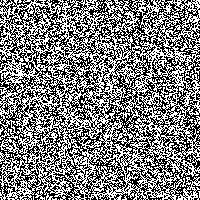

In [27]:
display_spin_field(random_spin_field(200,200))

In [28]:
def ising_step(field, beta=0.5):
    N, M = field.shape
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _ising_update(field, n, m, beta)
    return field


def _ising_update(field, n, m, beta):
    total = 0
    N, M  = field.shape
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i%N, j%M]
    dE = 2 * field[n, m] * total
    if dE < 0:
        field[n, m] *= -1 # switch
    elif np.exp(-dE * beta) > np.random.rand():
        field[n, m] *= -1
                

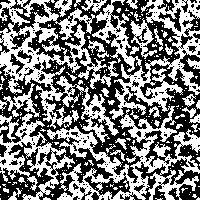

In [29]:
display_spin_field(ising_step(random_spin_field(200, 200)))

In [30]:
# Animate using ipywidgets

In [31]:
from ipywidgets import interact

In [32]:
def display_ising_sequence(images):
    def _show(frame=(0, len(images) -1)):
        return display_spin_field(images[frame])
    return interact(_show)

In [33]:
images = [random_spin_field(200, 200)]
for i in range(50):
    images.append(ising_step(images[-1].copy()))
display_ising_sequence(images)

interactive(children=(IntSlider(value=25, description='frame', max=50), Output()), _dom_classes=('widget-inter…

<function __main__.display_ising_sequence.<locals>._show(frame=(0, 50))>

In [34]:
%%cython
import numpy as np
cimport numpy as np # gives you access to Numpy C API
def cy_ising_step(field, beta=0.5):
    N, M = field.shape
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _cy_ising_update(field, n, m, beta)
    return field


def _cy_ising_update(field, n, m, beta):
    total = 0
    N, M  = field.shape
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i%N, j%M]
    dE = 2 * field[n, m] * total
    if dE < 0:
        field[n, m] *= -1 # switch
    elif np.exp(-dE * beta) > np.random.rand():
        field[n, m] *= -1

In [35]:
field = random_spin_field(200, 200)

%timeit ising_step(field)

%timeit cy_ising_step(field)

417 ms ± 21.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
393 ms ± 33.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%%cython
import numpy as np # gives access to python functions
cimport numpy as np # gives you access to Numpy C API

def cy_ising_step_fast(long[:, :]field, float beta=0.5):
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef  int n_offset, m_offset, n, m
   
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _cy_ising_update_fast(field, n, m, beta)
    return field


cdef _cy_ising_update_fast(long[:,:]field, int n, int m, float beta):
    cdef int total = 0
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef int i, j
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i%N, j%M]
    cdef float dE = 2 * field[n, m] * total
    if dE < 0:
        field[n, m] *= -1 # switch
    elif np.exp(-dE * beta) > np.random.rand():
        field[n, m] *= -1

In [37]:
field = random_spin_field(200, 200)

%timeit ising_step(field)

%timeit cy_ising_step(field)

%timeit cy_ising_step_fast(field)

414 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
382 ms ± 15.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
64.5 ms ± 2.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [38]:
%%cython 
import numpy as np # gives access to python functions
cimport numpy as np # gives you access to Numpy C API

from libc.math cimport exp
from libc.stdlib cimport rand  
cdef extern from "limits.h":
    int RAND_MAX

def cy_ising_step_faster(long[:, :]field, float beta=0.5):
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef  int n_offset, m_offset, n, m
   
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _cy_ising_update_faster(field, n, m, beta)
    return field


cdef _cy_ising_update_faster(long[:,:]field, int n, int m, float beta):
    cdef int total = 0
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef int i, j
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i%N, j%M]
    cdef float dE = 2 * field[n, m] * total
    if dE < 0:
        field[n, m] *= -1 # switch
    elif exp(-dE * beta) > rand()/RAND_MAX:
        field[n, m] *= -1

In [39]:
field = random_spin_field(200, 200)

%timeit ising_step(field)

%timeit cy_ising_step(field)

%timeit cy_ising_step_fast(field)

%timeit cy_ising_step_faster(field)

418 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
386 ms ± 18.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
63.6 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
5.54 ms ± 259 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [40]:
%%cython 
import numpy as np # gives access to python functions
cimport numpy as np # gives you access to Numpy C API
cimport cython

from libc.math cimport exp
from libc.stdlib cimport rand  
cdef extern from "limits.h":
    int RAND_MAX

@cython.boundscheck(False) # dont check index boundaries
@cython.wraparound(False) # can not use negative index
def cy_ising_step_fastest(long[:, :]field, float beta=0.5):
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef  int n_offset, m_offset, n, m
   
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _cy_ising_update_fastest(field, n, m, beta)
    return field


cdef _cy_ising_update_fastest(long[:,:]field, int n, int m, float beta):
    cdef int total = 0
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef int i, j
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i%N, j%M]
    cdef float dE = 2 * field[n, m] * total
    if dE < 0:
        field[n, m] *= -1 # switch
    elif exp(-dE * beta) > rand()/RAND_MAX:
        field[n, m] *= -1

In [41]:
field = random_spin_field(200, 200)

%timeit ising_step(field)

%timeit cy_ising_step(field)

%timeit cy_ising_step_fast(field)

%timeit cy_ising_step_faster(field)

%timeit cy_ising_step_fastest(field)

417 ms ± 22.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
377 ms ± 19.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
63.9 ms ± 1.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
5.48 ms ± 134 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.47 ms ± 120 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
